In [1]:
# - pandas (모듈)
#  - 새로운 자료구조 2개
#  - Series(1차원), DataFrame(2차원)

# - 엑셀 데이터를 DF로 만들기
#  - 컬럼 => 인덱스 => 데이터 값 순으로 가공
#  - 컬럼(사용할 컬럼 추리기, 컬럼명을 사용하기 좋게 바꾸기)
#  - 인덱스
#  - 데이터 값 (결측 데이터 처리, 데이터 타입 체크)

# - 시각화
#  - 데이터를 잘 이해하기 위해서, 살펴보기 위해서 => 현미경
#  - 카테고리 데이터(countplot)
#  - 연속된 숫자 데이터(히스토그램)
#  - 관계 : 카테고리 + 숫자(boxplot)
#  - 숫자 + 숫자 (산포도)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 머신러닝
# - 사이킷런(<= 잘만들어짐)
# - feature engineering
# - 하이퍼 파라미터 세팅
# - 모델 생성
# - 모델 훈련(fit)
# - 예측(predict), 검증(score)

In [4]:
# 머신러닝 데이터 나누기
# feature(2차원) // target(1차원)
# target이 있는 모델 => 지도학습
#     target => 카테고리형 : 분류모델(classification)
#     target => 연속된 수치형 : 회귀모델(regression)
# target이 없는 모델 => 비지도학습

In [5]:
train_path = r'C:\Users\user\Desktop\데이터분석 in 모빌리티 산업\실습 데이터\캐글 타이타닉\train.csv'
test_path = r'C:\Users\user\Desktop\데이터분석 in 모빌리티 산업\실습 데이터\캐글 타이타닉\test.csv'
# 경로 앞에 r을 붙이는 이유 => 백슬래시(\)를 이스케이프 문자 취급함
# 메타문자 : \ + 정해진 알파벳 -> 문자열에 특수한 효과를 가져옴
# r을 쓰면 문자 그 자체로 인식해라는 뜻  

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [6]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [8]:

# 결측데이터처리
# Name, Ticket, Cabin => 데이터로 추출
# 카테고리 데이터 => 수치형 데이터 변환 (인코딩)
# 숫자 데이터 => 스케일링


In [9]:
# 타이타닉 분석
# 1. 결측데이터 처리

In [10]:
df_train.isna().sum() # True -> 1 False -> 0

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df_train.isna().sum() / len(df_train) * 100 # Canbin은 결측데이터가 많아서 채우는 의미가 없다

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
df_test.isna().sum() / len(df_test) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [13]:
# 1.1 Embarked 결측 데이터 처리

In [14]:
df_train[df_train['Embarked'].isna()] # embarked 결측값 눈으로 확인하기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


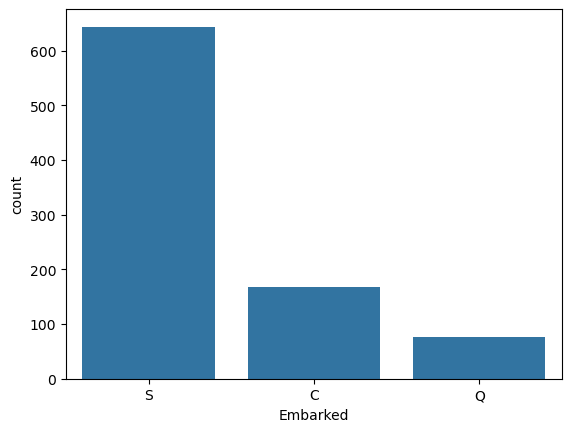

In [15]:
plt.figure()

sns.countplot(df_train, x='Embarked')

plt.show()

# 최빈도 값 => S -> C -> Q (카테고리형 데이터)

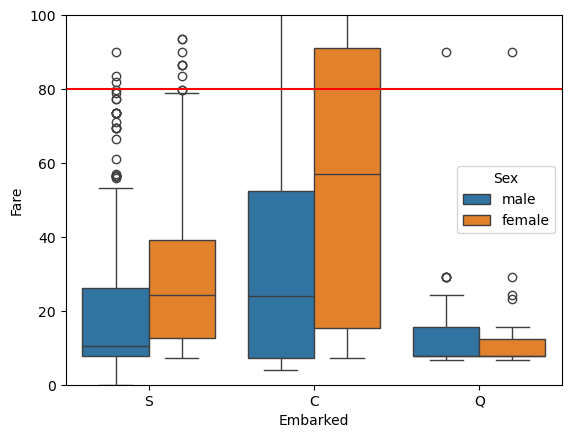

In [16]:
plt.figure()

sns.boxplot(df_train, x='Embarked', y='Fare', hue='Sex')
plt.ylim([0,100]) # y축 limit 설정
plt.axhline(80, color='red') # 80 값을 표시

plt.show()

# 아까 결측값들은 Fare가 80 이었음. S와 Q는 Fare==80이 outlier임
# 결측값들을 C로 하는 것이 좋을 것 같음

In [17]:
# 결측 데이터 덮어 씌우기
# 중간에 시리즈를 거치치 않고 데이터프레임에서 바로 바꿔줘야함! ex) df_train['Embarked'][61] X
# .loc 이용[조건, 컬럼] == .loc[인덱스, 컬럼]

df_train.loc[df_train['Embarked'].isna(),'Embarked'] = 'C'

In [18]:
df_train.iloc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                         C
Name: 61, dtype: object

In [19]:
# 1.2 Fare 결측값 처리

df_test[df_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


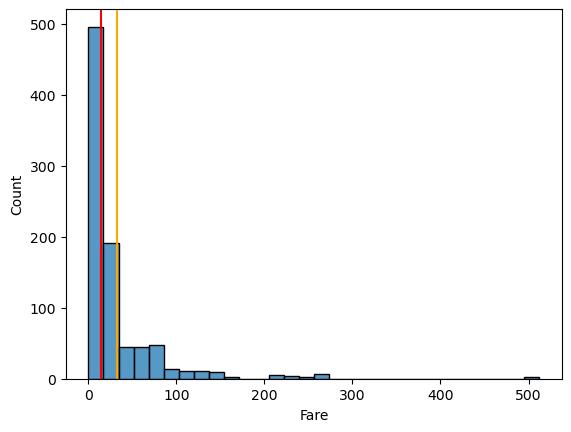

In [20]:
plt.figure()

sns.histplot(df_train, x='Fare', bins = 30)
plt.axvline(df_train['Fare'].mean(), color = 'orange')
plt.axvline(df_train['Fare'].median(), color = 'red')

plt.show()
# outlier가 평균을 오른쪽으로 이동시켜서 평균을 쓰면 안됨
# 이런 경우는 중앙값을 결측값으로 많이 채워넣음

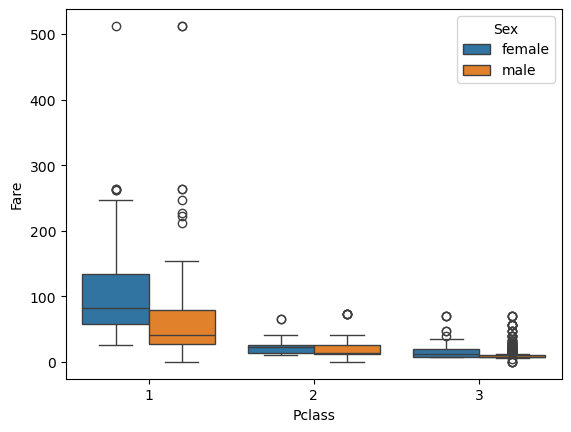

In [21]:
plt.figure()

sns.boxplot(df_train, x='Pclass', y ='Fare', hue='Sex')
            
plt.show()

In [22]:
df_train.groupby(['Pclass', 'Sex'])['Fare'].median()

Pclass  Sex   
1       female    82.66455
        male      41.26250
2       female    22.00000
        male      13.00000
3       female    12.47500
        male       7.92500
Name: Fare, dtype: float64

In [23]:
df_test.loc[df_test['Fare'].isna(), 'Fare'] = 7.925

In [24]:
df_train[df_train['Age'].isna()] # Age 결측값 눈으로 확인하기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


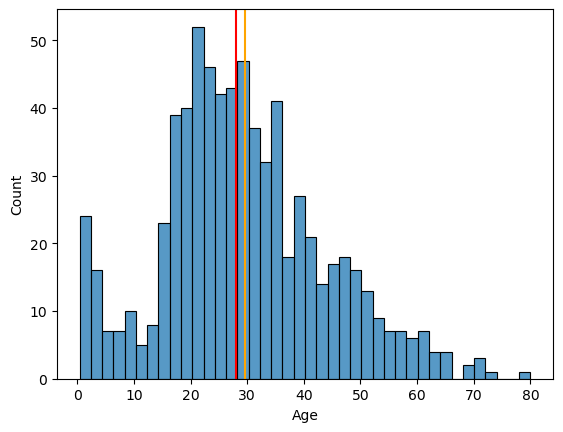

In [25]:
plt.figure()

sns.histplot(df_train, x='Age', bins = 40)
plt.axvline(df_train['Age'].mean(), color = 'orange')
plt.axvline(df_train['Age'].median(), color = 'red')

plt.show()

# 아까 결측값들은 Fare가 80 이었음. S와 Q는 Fare==80이 outlier임
# 결측값들을 C로 하는 것이 좋을 것 같음

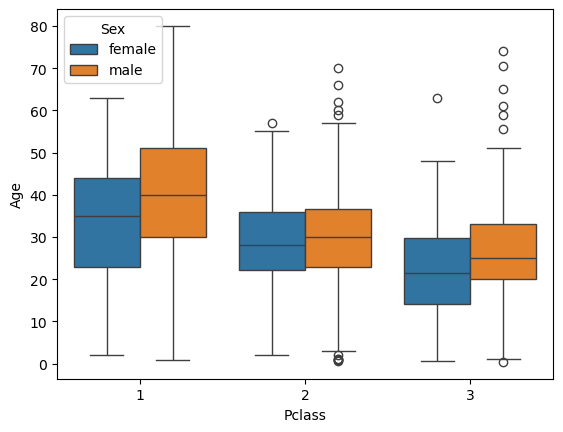

In [26]:
plt.figure()

sns.boxplot(df_train, x='Pclass', y ='Age', hue='Sex')
            
plt.show()

In [27]:
df_train.groupby(['Pclass', 'Sex'])['Age'].mean().round(1)

Pclass  Sex   
1       female    34.6
        male      41.3
2       female    28.7
        male      30.7
3       female    21.8
        male      26.5
Name: Age, dtype: float64

In [28]:
%config Completer.use_jedi = False

In [29]:
df_train.loc[(df_train['Age'].isna())&(df_train['Pclass'] == 1)&(df_train['Sex'] == 'female'), 'Age'] = 34.6
df_train.loc[(df_train['Age'].isna())&(df_train['Pclass'] == 1)&(df_train['Sex'] == 'male'), 'Age'] = 41.3
df_train.loc[(df_train['Age'].isna())&(df_train['Pclass'] == 2)&(df_train['Sex'] == 'female'), 'Age'] = 28.7
df_train.loc[(df_train['Age'].isna())&(df_train['Pclass'] == 2)&(df_train['Sex'] == 'male'), 'Age'] = 30.7
df_train.loc[(df_train['Age'].isna())&(df_train['Pclass'] == 3)&(df_train['Sex'] == 'female'), 'Age'] = 21.8
df_train.loc[(df_train['Age'].isna())&(df_train['Pclass'] == 3)&(df_train['Sex'] == 'male'), 'Age'] = 26.5

In [30]:
df_train[df_train['Age'].isna()] # Age 결측값 눈으로 확인하기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [31]:
df_test.loc[(df_train['Age'].isna())&(df_train['Pclass'] == 1)&(df_train['Sex'] == 'female'), 'Age'] = 34.6
df_test.loc[(df_train['Age'].isna())&(df_train['Pclass'] == 1)&(df_train['Sex'] == 'male'), 'Age'] = 41.3
df_test.loc[(df_train['Age'].isna())&(df_train['Pclass'] == 2)&(df_train['Sex'] == 'female'), 'Age'] = 28.7
df_test.loc[(df_train['Age'].isna())&(df_train['Pclass'] == 2)&(df_train['Sex'] == 'male'), 'Age'] = 30.7
df_test.loc[(df_train['Age'].isna())&(df_train['Pclass'] == 3)&(df_train['Sex'] == 'female'), 'Age'] = 21.8
df_test.loc[(df_train['Age'].isna())&(df_train['Pclass'] == 3)&(df_train['Sex'] == 'male'), 'Age'] = 26.5

In [32]:
# for문을 이용하여 모든 경우 채우기

age_means = df_train.groupby(['Pclass', 'Sex'])['Age'].mean()
# print(age_means)

for i in age_means.index:
    cond1 = df_train['Pclass'] == i[0]
    cond2 = df_train['Sex'] == i[1]
    cond3 = df_train['Age'].isna()

    df_train.loc[cond1 & cond2 & cond3, 'Age'] = age_means[i]

In [33]:
for i in age_means.index:
    cond1 = df_test['Pclass'] == i[0]
    cond2 = df_test['Sex'] == i[1]
    cond3 = df_test['Age'].isna()

    df_test.loc[cond1 & cond2 & cond3, 'Age'] = age_means[i]

In [34]:
## 2. Feature Engineering
 # - 숫자도 아니고 카테고리도 아닌 데이터들을 변형을 시켜줘서 둘 중 하나에 속하게 만들기
 # - 숫자 : 숫자들을 스탠다드 스케일링
 # - 카테고리 : 원핫인코딩

In [35]:
# feature들이 많으면 머신러닝 성능이 떨어짐 => 차원의 저주

In [ ]:
# 2.1 Name

In [36]:
df_train['Name'] # 아직 데이터가 아님. 카테고리도 수치형 데이터가 아님.

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [37]:
def get_name(x):
    return x.split(', ',)[1].split('.')[0]

df_train['Name'].apply(get_name)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [38]:
df_train['Name2'] = df_train['Name'].apply(get_name)

In [39]:
df_train['Name2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

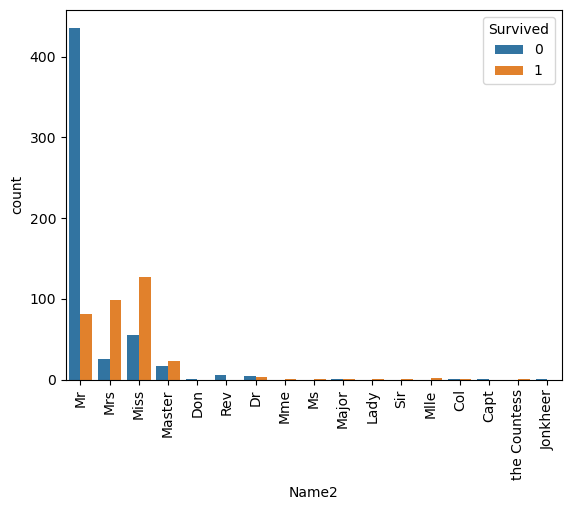

In [40]:
plt.figure()

sns.countplot(df_train, x='Name2', hue='Survived')
plt.xticks(rotation=90)

plt.show()

In [41]:
# 4가지 => 이거왜함? -> feature 수 줄이기 위해서
# Mr
# Master
# Woman
# Etc

In [42]:
df_train['Name2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [43]:
# 'Mr' => Mr
# 'Master' => Master
# 'Mrs', 'Miss', 'Mme', 'Ms', 'Lady', 'Mlle' => 'Woman'
# ... => 'Etc'

In [44]:
def to_categoryName(x):
    if x == 'Mr':
        return 'Mr'
    elif x == 'Master':
        return 'Master'
    elif x in ['Mrs', 'Miss', 'Mme', 'Ms', 'Lady', 'Mlle']:
        return 'Woman'
    else:
        return 'Etc'

df_train['Name_C'] = df_train['Name2'].apply(to_categoryName)

In [45]:
df_train['Name_C'].unique()

array(['Mr', 'Woman', 'Master', 'Etc'], dtype=object)

In [47]:
df_test['Name2'] = df_test['Name'].apply(get_name)
df_test['Name_C'] = df_test['Name2'].apply(to_categoryName)
df_test['Name_C'].unique()

array(['Mr', 'Woman', 'Master', 'Etc'], dtype=object)

In [49]:
# 2.2 Family

In [51]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch']

In [53]:
df_train['Family'].unique() # 적절하게 줄이기

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

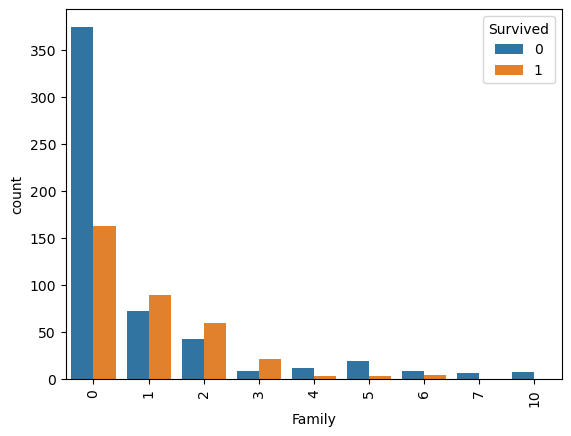

In [57]:
plt.figure()

sns.countplot(df_train, x='Family', hue='Survived')
plt.xticks(rotation=90)

plt.show()

# 혼자탄사람 / 동반 숫자 적은사람 / 동반숫자 많은사람

In [61]:
def to_categoryFamily(x):
    if x == 0:
        return 'Alone'
    elif x in [1,2,3]:
        return 'Small_f'
    else:
        return 'Big_f'

df_train['Family_c'] = df_train['Family'].apply(to_categoryFamily)
df_train['Family_c'].unique()

array(['Small_f', 'Alone', 'Big_f'], dtype=object)

In [65]:
# test 셋에도 똑같이 적용

df_test['Family'] = df_test['SibSp'] + df_test['Parch']
df_test['Family_c'] = df_test['Family'].apply(to_categoryFamily)
df_test['Family_c'].unique()

array(['Alone', 'Small_f', 'Big_f'], dtype=object)

In [71]:
# 2.3 숫자데이터 스케일링 => Age, Fare -> 스탠다드 스케일링

In [69]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name2,Name_C,Family,Family_c
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,1,Small_f
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Woman,1,Small_f
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Woman,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Woman,1,Small_f
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Etc,0,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Woman,0,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.8,1,2,W./C. 6607,23.4500,NaN,S,Miss,Woman,3,Small_f
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Mr,0,Alone


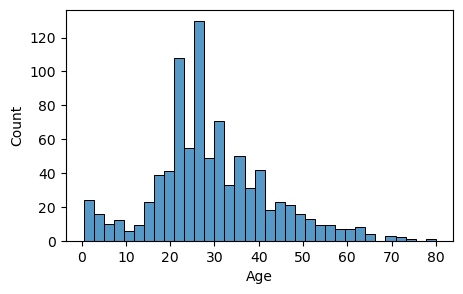

In [77]:
plt.figure(figsize=(5,3))

sns.histplot(df_train, x='Age', bins=35)

plt.show()

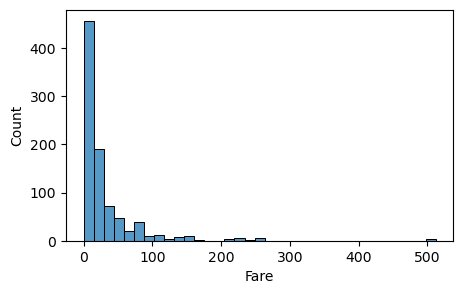

In [81]:
plt.figure(figsize=(5,3))

sns.histplot(df_train, x='Fare', bins=35)

plt.show()

# Outlier 때문에 망가져버림. 꼬리값을 누그려뜨려야함 => 로그변환을 하면 꼬리값의 값이 누그러뜨려짐(로그함수 참고 : 거리가 줄어듬)

In [89]:
# Fare를 log 변환을 통해 꼬리값을 약화시키자

df_train['Fare_log'] = np.log(df_train['Fare']+1) # => numpy의 로그변환(0 이들어있으면 로그변환하면 무한대 값이 나와버림 그래서 x가 0인 경우를 대비해서 +1을하고 로그변환)

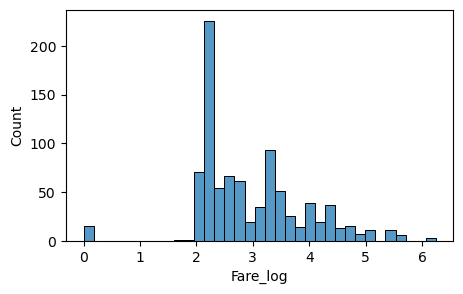

In [91]:
plt.figure(figsize=(5,3))

sns.histplot(df_train, x='Fare_log', bins=35)

plt.show()

# Outlier 때문에 망가져버림. 꼬리값을 누그려뜨려야함 => 로그변환을 하면 꼬리값의 값이 누그러뜨려짐(로그함수 참고 : 거리가 줄어듬)

In [93]:
# Age와 Fare_log를 표준 스케일링 =
# 표준화 -> 평균으로 뺀다음에 표준편차로 나눠주기

age_mean = df_train['Age'].mean()
age_std = df_train['Age'].std()
# 이렇게 직접 계산하지 않음



# 직접 계산하지 않고 sklearn 이용
# 1. 스케일러 생성
# 2. 스케일러 훈련(train)
# 3. 실제 적용(train, test)

from sklearn.preprocessing import StandardScaler

In [103]:
# 1. 스케일러 생성
stndsclr = StandardScaler()

# 2. 스케일러를 훈련
stndsclr.fit(df_train[['Age', 'Fare_log']])

# 3. 실제 적용(train, test)
df_train[['Age_s', 'Fare_s']] = stndsclr.transform(df_train[['Age', 'Fare_log']])

In [107]:
# test 셋도 똑같이 해주기

df_test['Fare_log'] = np.log(df_test['Fare']+1)
df_test[['Age_s', 'Fare_s']] = stndsclr.transform(df_test[['Age', 'Fare_log']])

In [111]:
# 공장데이터 -> 숫자데이터
# 결측값처리 -> 스케일러 -> 사이킷런 이용

In [113]:
# 2.4 카테고리 데이터 인코딩

In [119]:
df_train.columns # 인코딩 해야하는 컬럼-> 'Pclass', 'Sex', 'Embarked', 'Name_C', 'Family_c'
cate_cols = ['Pclass', 'Sex', 'Embarked', 'Name_C', 'Family_c']

In [125]:
df_train_fin = pd.get_dummies(df_train, columns=cate_cols, dtype='int', drop_first=True) # 원핫인코딩
# 첫번째 feature를 100이 아니라 00으로 표현하도록(feature 수가 많아지면 안되니까) -> drop_first

In [133]:
df_test_fin = pd.get_dummies(df_test, columns=cate_cols, dtype='int', drop_first=True) # 원핫인코딩
# 첫번째 cols를 지워줌 -> drop_first
df_train_fin

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Name2,...,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Name_C_Master,Name_C_Mr,Name_C_Woman,Family_c_Big_f,Family_c_Small_f
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,Mr,...,0,1,1,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Mrs,...,0,0,0,0,0,0,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,...,0,1,0,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Mrs,...,0,0,0,0,1,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,Mr,...,0,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,Rev,...,1,0,1,0,1,0,0,0,0,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,Miss,...,0,0,0,0,1,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",21.8,1,2,W./C. 6607,23.4500,NaN,Miss,...,0,1,0,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,Mr,...,0,0,1,0,0,0,1,0,0,0


In [131]:
# 2.5 데이터 정리

In [137]:
df_train_fin.columns

feature_names = ['Age_s', 'Fare_s',
'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S',
'Name_C_Master', 'Name_C_Mr', 'Name_C_Woman', 'Family_c_Big_f',
'Family_c_Small_f']

In [143]:
# 훈련할 feature와 target을 나눔

X = df_train_fin[feature_names] # 이제 우리가 머신러닝 돌리려는 컬럼만 남겨버림.
y = df_train_fin['Survived']

In [145]:
from sklearn.model_selection import train_test_split

In [147]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, 
                                                      test_size=0.3, 
                                                      random_state=1, 
                                                      stratify=y)

In [149]:
1 90
0 10

1

,Age_s,Fare_s,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Name_C_Master,Name_C_Mr,Name_C_Woman,Family_c_Big_f,Family_c_Small_f
472,0.277255,0.409283,1,0,0,0,1,0,0,1,0,1
597,1.482729,-3.058578,0,1,1,0,1,0,1,0,0,0
843,0.390268,-0.986791,0,1,1,0,0,0,1,0,0,0
112,-0.551509,-0.784179,0,1,1,0,1,0,1,0,0,0
869,-1.907667,-0.481456,0,1,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
650,-0.212469,-0.801924,0,1,1,0,1,0,1,0,0,0
241,-0.566577,-0.164052,0,1,0,1,0,0,0,1,0,1
265,0.503281,-0.536806,1,0,1,0,1,0,1,0,0,0
15,1.934782,-0.133229,1,0,0,0,1,0,0,1,0,0


In [151]:
# 3. 머신러닝 모델 사용하여 예측
# 3.1 KNN

In [153]:
from sklearn.neighbors import KNeighborsClassifier # 타겟데이터 카테고리형 => classifier
from sklearn.model_selection import cross_val_score

In [169]:
# 하이퍼 파라미터 찾아보기

score_list = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, train_x, train_y, cv=5).mean()
    score_list.append(score)

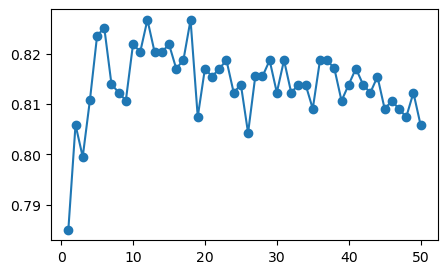

In [173]:
plt.figure(figsize=(5,3))

plt.plot(range(1, 51), score_list, marker='o')

plt.show()

# 11이 best parmeter 같음.

In [177]:
# k <= 11로 찾음!
# 1. 모델생성
knn_11 = KNeighborsClassifier(n_neighbors=11)

# 2. 훈련
knn_11.fit(train_x, train_y)

# 3. 검증
knn_11.score(valid_x, valid_y)

0.8059701492537313

In [179]:
# 테스트 셋 예측
knn_11.predict(df_test_fin[feature_names])

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [187]:
# 테스트 셋 예측
knn_result = df_test_fin[['PassengerId']]
knn_result['Survived'] = knn_11.predict(df_test_fin[feature_names])

C:\Users\user\AppData\Local\Temp\ipykernel_8612\4040503926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_result['Survived'] = knn_11.predict(df_test_fin[feature_names])


In [197]:
knn_result.to_csv(r'C:\Users\user\Desktop\데이터분석 in 모빌리티 산업\실습 데이터\캐글 타이타닉\result.csv', index=False)

In [201]:
# SVM 써보기
# Cost => 경계선 근처에서 틀리는 것에 대한 비용
    # - 너무커지면 : 오버피팅
    # - 너무 작으면 : 언더피팅
# 오버 피팅과 적정 피팅 사이 에서 cost 찾기
# -  rdf -> gamma(고차원에서 데이터의 형태를 얼마나 잘 피팅 시킬 것이냐)
#     - 너무 커지면 : 오버 피팅
#     - 너무 작아지면 : 언더 피팅
# - poly -> degree(몇 차 방정식 커널을 쓸거냐)
#     - 너무 커지면 : 오버 피팅
#     - 너무 작아지면 : 언더 피팅

In [205]:
# 하이퍼 파라미터 찾아보기
# C, gamma

from sklearn.model_selection import GridSearchCV # 모든 경우의수를 자동으로 체크해주고 베스트를 찾아줌
from sklearn.svm import SVC

In [213]:
params = {'C':[0.01, 0.1, 1, 10], 'gamma':[0.01, 0.1, 1, 10]}

# 그리드 서치하는 모델이 생성
grid_svm = GridSearchCV(SVC(), params, cv=5)

# 모델에 데이터 넣고 피팅
grid_svm.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]})

In [215]:
grid_svm.best_params_

{'C': 1, 'gamma': 0.1}

In [239]:
svm_grid_result = pd.DataFrame(grid_svm.cv_results_['params'])
svm_grid_result['score'] = grid_svm.cv_results_['mean_test_score']

pd.pivot_table(svm_grid_result, index='C', columns='gamma', values='score', aggfunc =  'mean')

gamma,0.01,0.10,1.00,10.00
C,,,,
0.01,0.616374,0.616374,0.616374,0.616374
0.10,0.616374,0.794555,0.760800,0.616374
1.00,0.781677,0.829884,0.820335,0.756116
10.00,0.829884,0.817135,0.807497,0.759316


In [244]:
svm_result = df_test_fin[['PassengerId']]
svm_result['survived'] = grid_svm.predict(df_test_fin[feature_names])

C:\Users\user\AppData\Local\Temp\ipykernel_8612\3876757581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svm_result['survived'] = grid_svm.predict(df_test_fin[feature_names])


In [246]:
svm_result

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [248]:
knn_result.to_csv(r'C:\Users\user\Desktop\데이터분석 in 모빌리티 산업\실습 데이터\캐글 타이타닉\result_svm.csv', index=False)

In [252]:
# 3.3 tree
# - 설명력! => gini 점수를 높은 질문을 하면서 순수한 데이터가 남을때까지 계속함(오버피팅 가능성이 많음 -> 가지치기를 해서 오버피팅을 막아야함)

In [254]:
# 설명하긴 좋지만 오버피팅이 많이 됨. -> 약한트리 100개 만듬 => 랜덤 포레스트

In [276]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# DecisionTreeClassifier

# max_depth
# min_samples_leaf

In [260]:
params = {'max_depth':[3, 5, 10, 20], 'min_samples_leaf':[1, 10, 30]}

grid_tree = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid_tree.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [1, 10, 30]})

In [262]:
grid_tree.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

In [268]:
tree_grid_result = pd.DataFrame(grid_tree.cv_results_['params'])
tree_grid_result['score'] = grid_tree.cv_results_['mean_test_score']

pd.pivot_table(tree_grid_result, index='max_depth', columns='min_samples_leaf', values='score', aggfunc='mean')

min_samples_leaf,1,10,30
max_depth,,,
3,0.815432,0.809019,0.804194
5,0.821871,0.809110,0.796194
10,0.799445,0.801019,0.796194
20,0.810581,0.801019,0.796194


In [270]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=5)

In [272]:
tree.feature_importances_

array([0.12665691, 0.07802374, 0.01475992, 0.07756979, 0.02860353,
       0.        , 0.00875188, 0.        , 0.49796479, 0.        ,
       0.16434044, 0.00332901])

In [274]:
train_x.columns

Index(['Age_s', 'Fare_s', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Name_C_Master', 'Name_C_Mr', 'Name_C_Woman',
       'Family_c_Big_f', 'Family_c_Small_f'],
      dtype='object')

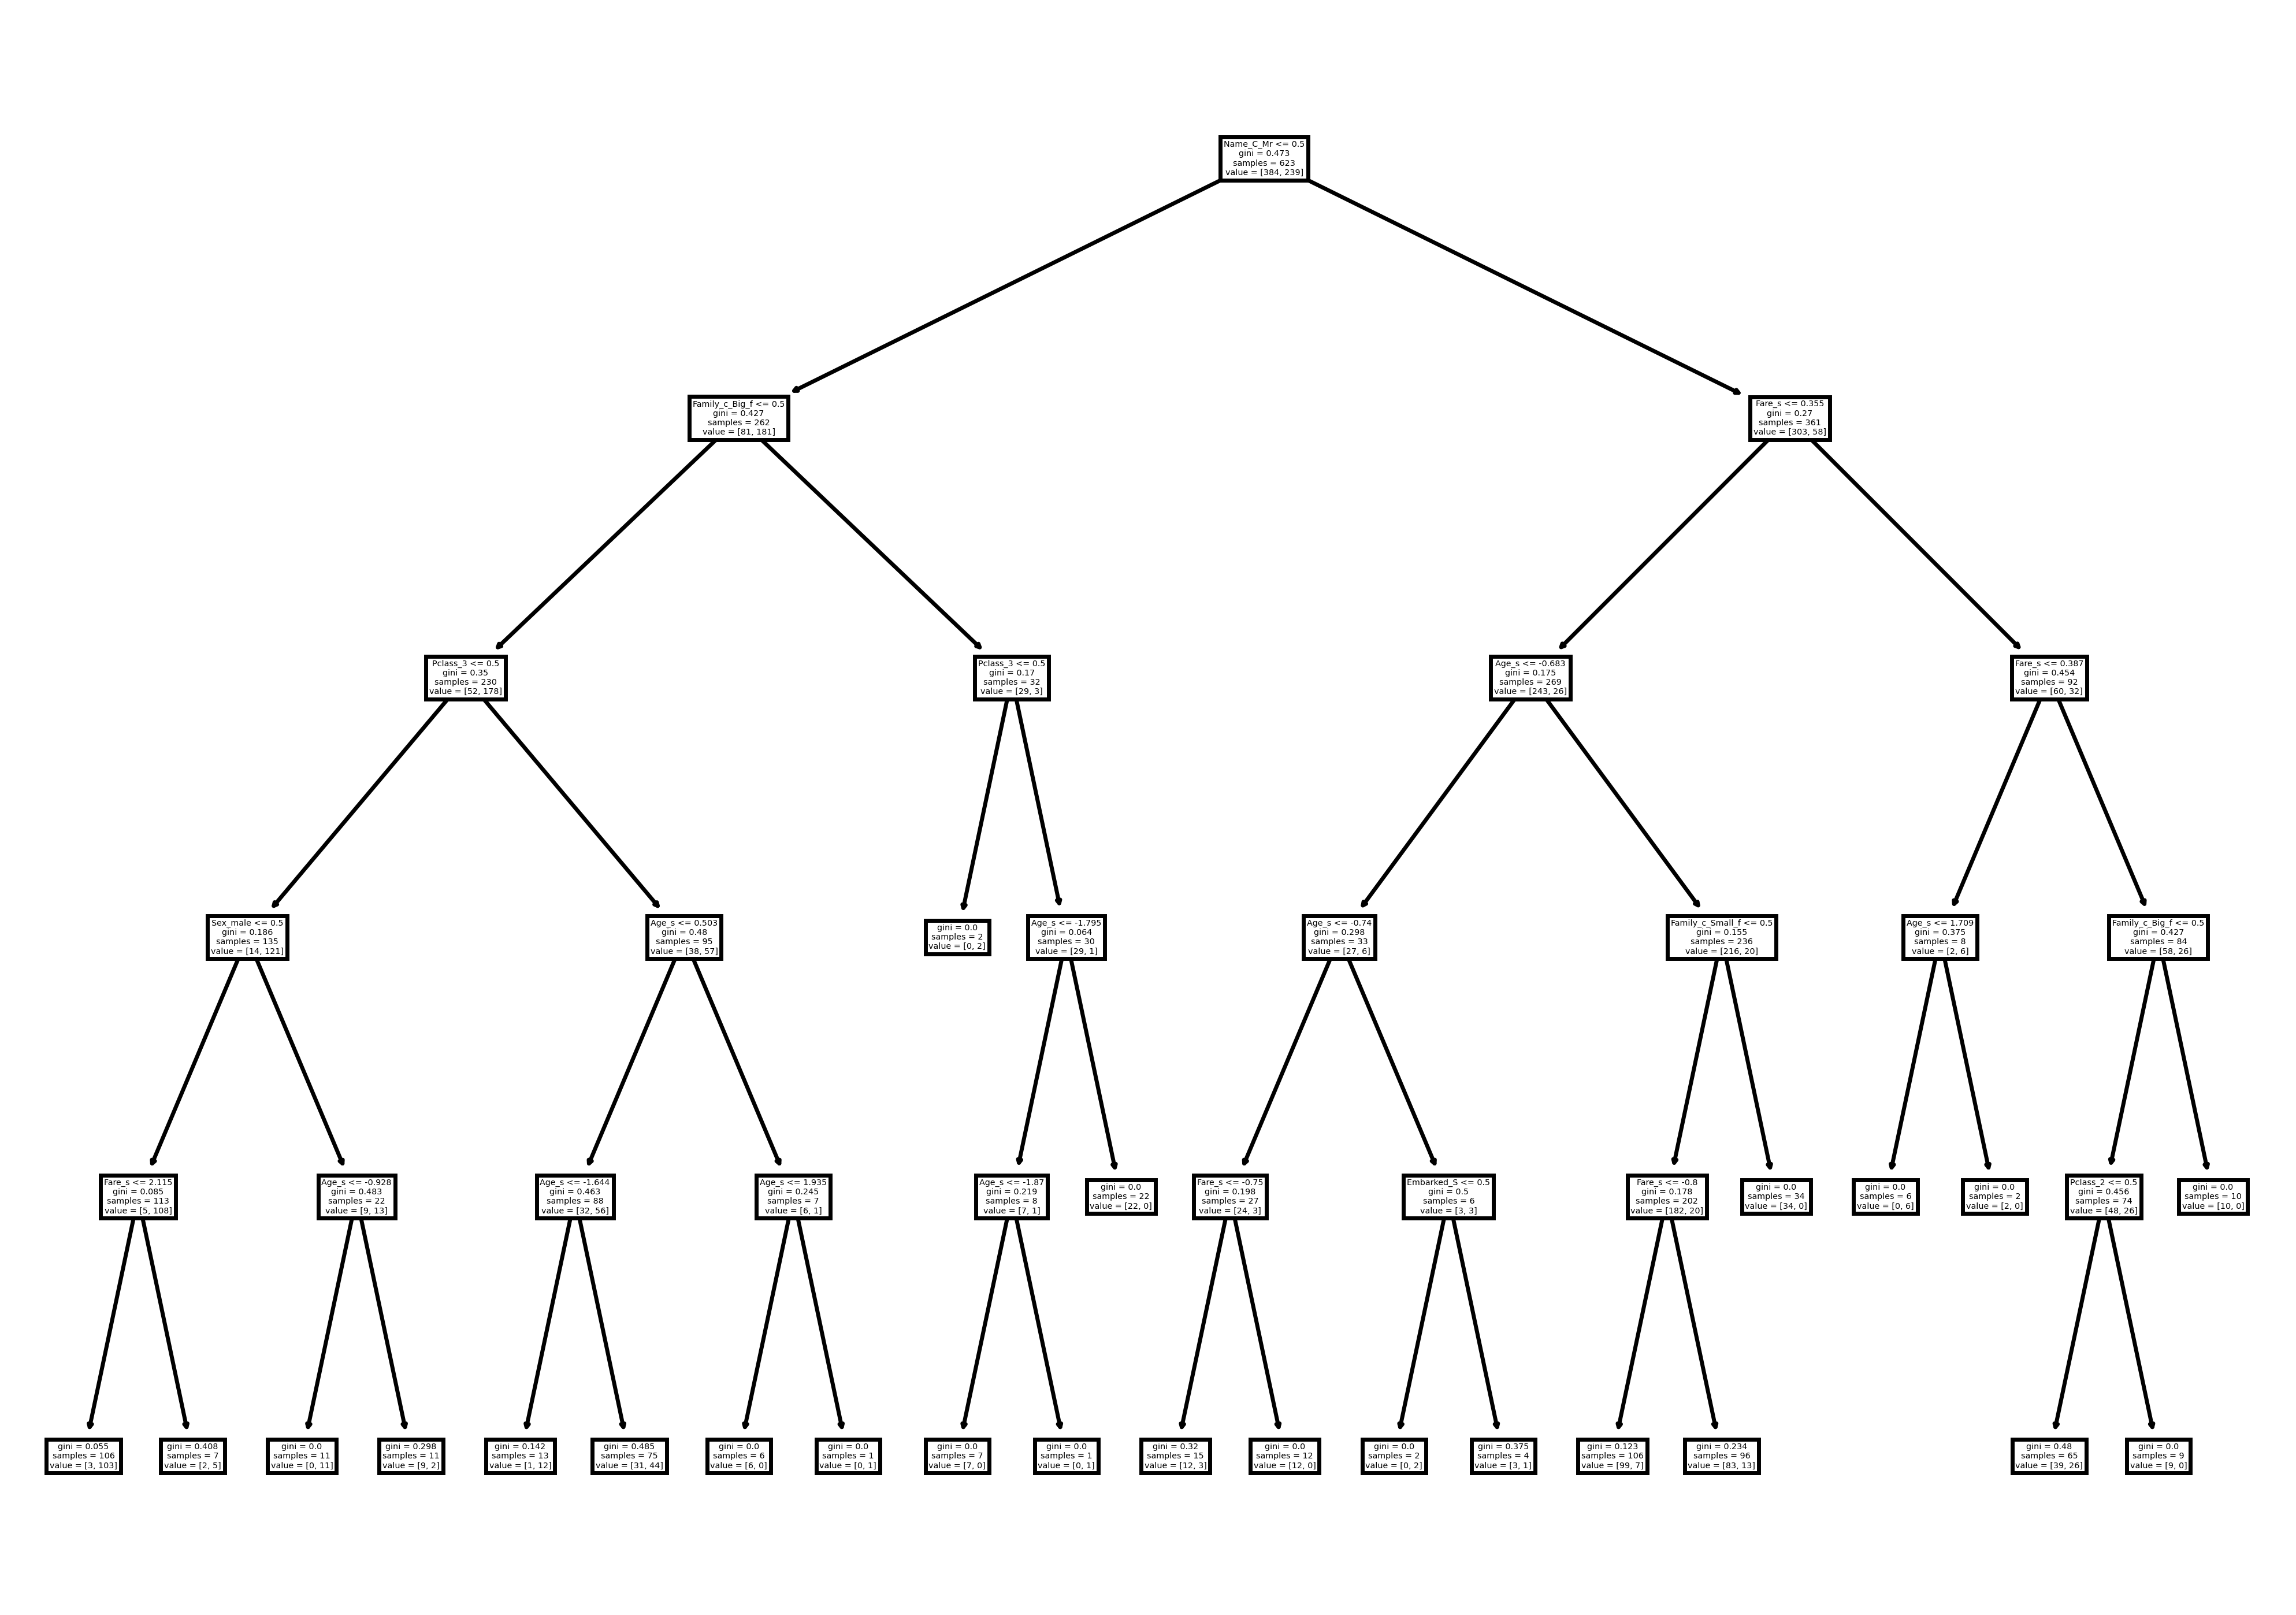

In [280]:
plt.figure(dpi=500, figsize=(10,7))

plot_tree(tree, feature_names=train_x.columns)

plt.savefig(r'C:\Users\user\Desktop\데이터분석 in 모빌리티 산업\실습 데이터\캐글 타이타닉\tree.png')
plt.show()

In [282]:
# 3.4 random forest
# - 약한 나무 여러개를 심어서 예측력을 높이고 오버피팅 극복
# - 다양성 2
#     - 사용할 feature들을 랜덤하게 선택
#     - 훈련하는 데이터를 bootstrap이라는 샘플링 기법을 이용해서 나무마다 다르게 구성

In [284]:
from sklearn.ensemble import RandomForestClassifier

In [286]:
# max_depth
# min_samples_leaf

# RandomForestClassifier

In [288]:
params = {'max_depth':[3, 5, 10, 20], 'min_samples_leaf':[1, 10, 30]}

grid_randomforest = GridSearchCV(RandomForestClassifier(random_state=1), params, cv=5)
grid_randomforest.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [1, 10, 30]})

In [290]:
grid_randomforest.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

In [292]:
randomforest_grid_result = pd.DataFrame(grid_randomforest.cv_results_['params'])
randomforest_grid_result['score'] = grid_randomforest.cv_results_['mean_test_score']

pd.pivot_table(randomforest_grid_result, index='max_depth', columns='min_samples_leaf', values='score', aggfunc='mean')

min_samples_leaf,1,10,30
max_depth,,,
3,0.825045,0.825032,0.791342
5,0.829884,0.813819,0.791342
10,0.823510,0.810632,0.791342
20,0.813845,0.810632,0.791342


In [294]:
grid_randomforest.score(valid_x, valid_y)

0.8283582089552238

In [296]:
rf_result = df_test_fin[['PassengerId']]
rf_result['Survived'] = grid_randomforest.predict(df_test_fin[feature_names])

C:\Users\user\AppData\Local\Temp\ipykernel_8612\983030583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_result['Survived'] = grid_randomforest.predict(df_test_fin[feature_names])


In [298]:
rf_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [300]:
rf_result.to_csv(r'C:\Users\user\Desktop\데이터분석 in 모빌리티 산업\실습 데이터\캐글 타이타닉\result_rf.csv', index=False)

In [ ]:
# # 타이타닉 => 숫자 데이터가 없음
# # 공장데이터 => 숫자(결측데이터, 스케일링)

# EDA(탐색적 데이터 분석)
#     - 공식(카테고리, 연속된 숫자)

# 결측데이터
#     - 평균, 중앙값(수치형 데이터) / 최빈도값(카테고리형 데이터)
#     - 다른 feature를 가지고 유추
#     - 머신러닝

# 특성가공
#     - 카테고리도 아니고, 숫자도 아닌 것들을 다 카테고리, 숫자로 바꾸기
#     - *스케일링
#     - *인코딩